<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.13


In [72]:
# pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

Önceden eğitilmiş bir model, daha önce büyük bir veri kümesinde, genellikle büyük ölçekli bir görüntü sınıflandırma görevinde eğitilmiş kayıtlı bir ağdır. Ya önceden eğitilmiş modeli olduğu gibi kullanırsınız ya da bu modeli belirli bir göreve göre özelleştirmek için transfer öğrenimini kullanırsınız.

# Keras Syntax Basics

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [75]:
## for colab
#from google.colab import drive
#drive.mount('/content/drive')

In [76]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

# Exploratory Data Analysis and Visualization

In [7]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [8]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


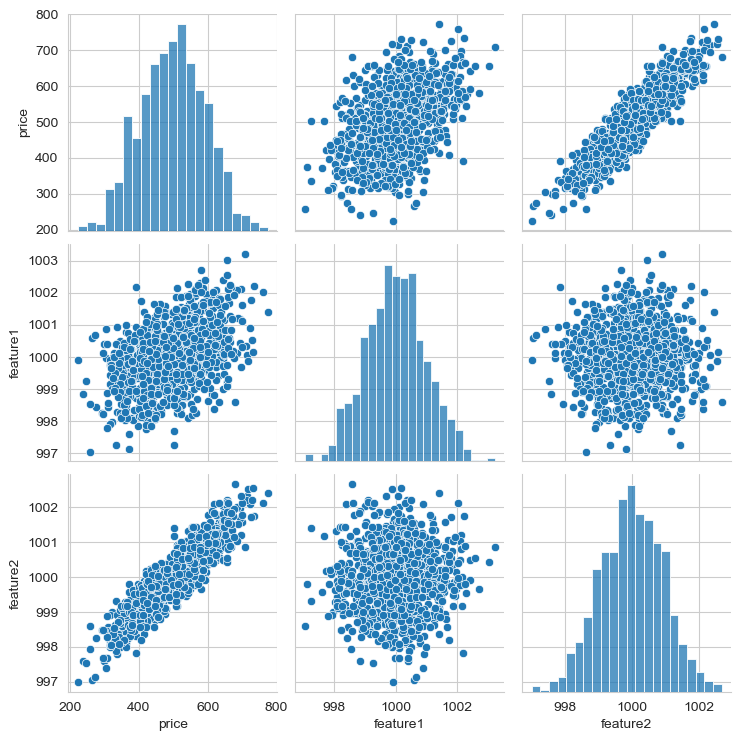

In [11]:
sns.pairplot(df);

In [12]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

## In NN, we need to feed the data to the network as an array, not a dataframe. 
## However, we do not use this format because we will already obtain an array when we apply scaling in this notebook.

In [15]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [19]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [20]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
X_train.shape

(700, 2)

In [23]:
X_test.shape

(300, 2)

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Since gradient descent algorithm is used for optimization,
# ...the model can learn faster when scaling is performed.
# Usually min-max scaling is used.

In [27]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [28]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential  # model type
from tensorflow.keras.layers import Input, Dense, Activation  # layer type

In [34]:
# help(Sequential)

In [35]:
# help(Dense)

In [36]:
X_train.shape

(700, 2)

In [100]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])
model

In [40]:
# Second way to create model (recommended)

model = Sequential()  # denote model type

#model.add(Input(shape = X_train.shape[1]))  # input layer
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))  # 1.hidden layer 
# dense means it is to add a fully connected layer.
# units are neurons. let be 4 neuron in first layer and Let the activation function be relu. 
model.add(Dense(units = 4, activation = "relu"))  # 2.hidden layer
model.add(Dense(units = 4, activation = "relu"))  # 3.hidden layer
model.add(Dense(units = 1))  # output layer
# There is a neuron in output layer in regression problems.

> If there are very different features from each other, activation functions can be differentiated.

In [43]:
# parameters to learn are weights and bias.
model.summary()  
# None in output shape is related to batch size

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


> The cost function will set 57 parameters to minimize it.

In [44]:
model.weights  # initial weights and bias

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.71200895, -0.6003752 , -0.34693694, -0.79151464],
        [-0.29260063,  0.4359045 ,  0.26693225, -0.9419658 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.3766076 ,  0.39112025,  0.54250723,  0.06395984],
        [-0.28449368, -0.78779554, -0.5826167 , -0.71894825],
        [-0.1134308 , -0.77499753,  0.4202729 ,  0.12254506],
        [ 0.7785836 ,  0.3535686 , -0.75364846,  0.84021145]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4808938 ,  0.61479324, -0.5394373 , -0.05006909],
        [ 0.39588577,  0.7507774 ,  0.5616806 , -0.42534417],
        [ 0.7795524 , -0.30362332, -0.654

## Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [45]:
model.compile(optimizer = "rmsprop", loss = "mse")  
# we have defined the model. The above was the operations architecture.

In [46]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# 22 iterations will be performed in each epoch

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256594.8594
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256441.3438
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256288.2812
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256118.2656
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255926.8594
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255714.6562
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255479.3594
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255219.0469
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254931.4688
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 254614.4531
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254267.4219
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 2954.1248
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 2915.2649
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 2884.5066
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 2845.6223
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 2812.5459
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 2779.9814
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 2748.1904
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 2713.9250
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 2683.2537
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 2649.6086
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 2616.6597
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 2583.71

Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 282.1191
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 267.0425
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 252.0456
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 239.7161
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 226.4104
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 213.1832
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 198.6639
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 186.6176
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 174.4988
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 164.6670
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 152.3676
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 1

In [107]:
model.weights

[<tf.Variable 'dense_20/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.2868385 ,  0.4796229 ,  0.262701  ,  0.45689213],
        [ 0.35561997,  0.90699065, -1.0185189 , -0.30800977]],
       dtype=float32)>,
 <tf.Variable 'dense_20/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.04861005, -0.04658766, -0.03995674, -0.05501598], dtype=float32)>,
 <tf.Variable 'dense_21/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.21944168, -0.8669781 ,  0.11037426,  0.06427366],
        [ 0.26160476,  0.6177993 ,  0.05895042, -0.4627604 ],
        [-0.4616669 ,  0.40876785, -0.1758755 , -0.5852218 ],
        [-0.21697807,  0.3768281 ,  0.3018528 , -0.22092557]],
       dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.05134416, -0.0485574 , -0.05525023,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_22/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.07376472, -0.72066915,  0.29354334,  0.3279208 ],
        [ 0.12175294,  0.55

In [47]:
model.history.history  # shows the lost in each epoch.

{'loss': [256594.859375,
  256441.34375,
  256288.28125,
  256118.265625,
  255926.859375,
  255714.65625,
  255479.359375,
  255219.046875,
  254931.46875,
  254614.453125,
  254267.421875,
  253888.609375,
  253474.234375,
  253021.390625,
  252522.1875,
  251972.78125,
  251373.171875,
  250722.75,
  250013.171875,
  249244.6875,
  248409.09375,
  247509.25,
  246543.71875,
  245503.546875,
  244386.28125,
  243192.78125,
  241917.96875,
  240557.046875,
  239102.1875,
  237555.40625,
  235915.8125,
  234184.609375,
  232340.0,
  230398.125,
  228338.03125,
  226166.453125,
  223890.5625,
  221492.875,
  218974.875,
  216333.4375,
  213570.71875,
  210674.765625,
  207671.453125,
  204534.0625,
  201254.015625,
  197836.65625,
  194289.53125,
  190616.78125,
  186823.390625,
  182855.453125,
  178771.390625,
  174547.890625,
  170213.4375,
  165764.578125,
  161173.578125,
  156475.859375,
  151624.875,
  146680.6875,
  141630.609375,
  136462.9375,
  131208.34375,
  125858.6953125,

In [53]:
len(model.history.history["loss"])

250

In [54]:
pd.DataFrame(model.history.history)

,loss
0,256594.859
1,256441.344
2,256288.281
3,256118.266
4,255926.859
...,...
245,24.302
246,24.039
247,24.153
248,24.453


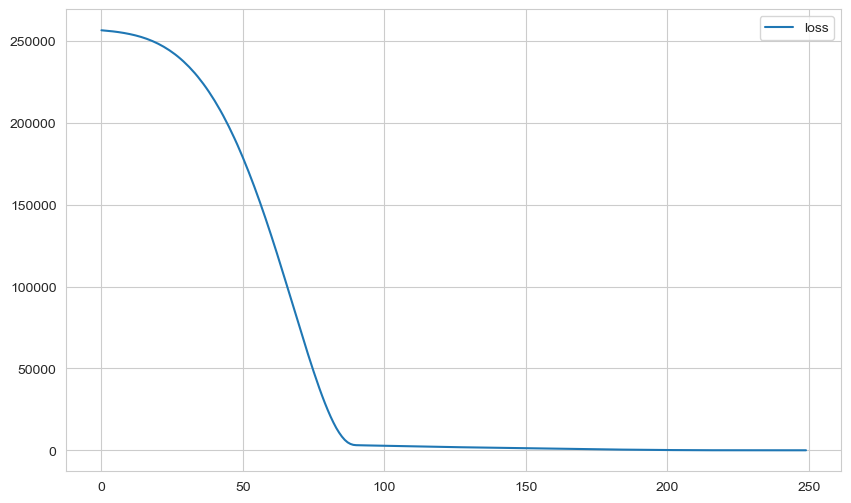

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

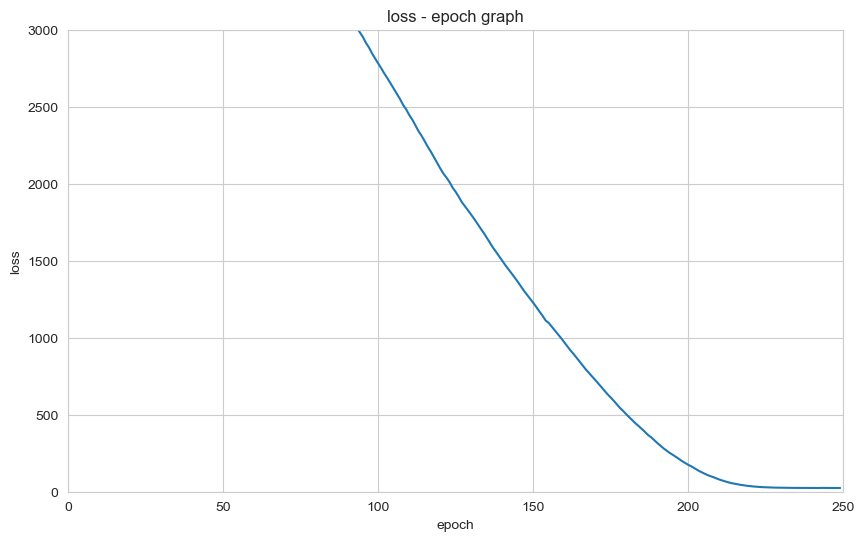

In [56]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show()

## Model Performance

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
model.evaluate(X_train, y_train, verbose=0) 

23.800493240356445

In [63]:
model.evaluate(X_test, y_test, verbose=0) 

25.262962341308594

In [64]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [65]:
y_test.shape

(300,)

In [76]:
y_pred.reshape(-1).shape

(300,)

In [77]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
361,485.504,489.953
198,418.457,418.310
823,649.440,641.491
731,581.248,586.437
925,503.050,511.492
635,435.262,432.512
797,618.123,621.982
70,477.431,485.136
501,315.519,322.022
215,625.079,631.167


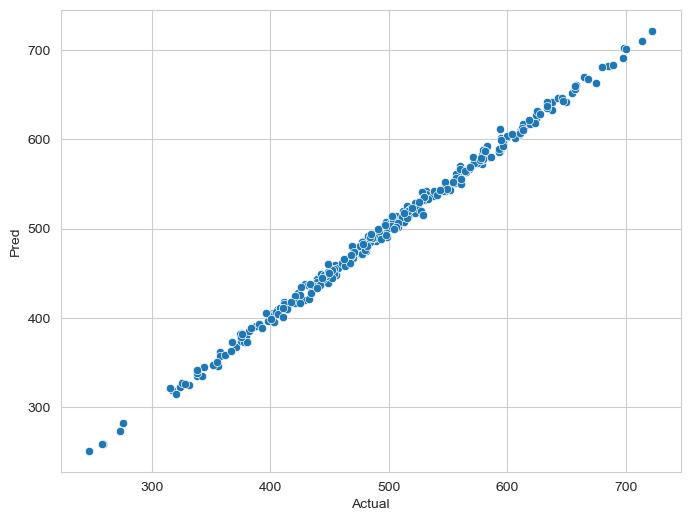

In [71]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [74]:
eval_metric(y_test, y_pred)

r2_score: 0.9971266067138012 
mae: 4.05683617570402 
mse: 25.262964759444777 
rmse: 5.026227686789047


# Final Model and Model Deployment

## Final Model Training

In [99]:
scaler = MinMaxScaler().fit(X)

In [100]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [101]:
X_scaled = scaler.transform(X)

In [102]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257396.4688
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257287.3438
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257160.0781
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256992.0625
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256770.4219
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 256481.3906
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 256114.3125
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 255662.7812
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 255115.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 254461.1094
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 253689.0156
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 1ms/step - loss: 381.6955
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 356.1796
Epoch 99/250
32/32 [==============================] - 0s 1ms/step - loss: 332.2931
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 307.9907
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 284.7035
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 260.5861
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 238.7213
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 217.5271
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 197.4454
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 178.3533
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 160.0760
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 143.9754
Epoch 10

32/32 [==============================] - 0s 1ms/step - loss: 24.5182
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8309
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8206
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6662
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 25.3591
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5693
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.3372
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 25.1075
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 25.1040
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6823
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7793
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5939
Epoch 207/250
32/3

In [103]:
# final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [104]:
final_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


## Saving the Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [105]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [106]:
#final_model.save("model_fake_reg") 

## Loading Model

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model_fake_reg = load_model('model_fake_reg.h5')

In [109]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [110]:
sample = [[998, 1000]]

In [111]:
sample_scaled = scaler_fake_reg.transform(sample)

In [112]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 56ms/step


array([[420.96106]], dtype=float32)

## Prediction-2

In [113]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [114]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [115]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [116]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 21ms/step


array([[380.72192],
       [332.24707],
       [283.7722 ],
       [235.29732],
       [186.82246]], dtype=float32)